In [20]:
import pandas as pd
import numpy as np
import numexpr as ne
import matplotlib
from matplotlib import pyplot as plot
import seaborn as sns## dessiner

### pd.Series

In [2]:
s1 = pd.Series([1,2,3,4,np.nan,5,6,7])
print(s1)

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
5    5.0
6    6.0
7    7.0
dtype: float64


##### .values()

In [7]:
print(s1.values)
for i in s1.values:
    print(i)
L = [i for i in s1.values]
print(L)

[ 1.  2.  3.  4. nan  5.  6.  7.]
1.0
2.0
3.0
4.0
nan
5.0
6.0
7.0
[1.0, 2.0, 3.0, 4.0, nan, 5.0, 6.0, 7.0]


##### .index()

In [9]:
print(s1.index)

RangeIndex(start=0, stop=8, step=1)


##### Modifier l'index

In [10]:
s2 = pd.Series([21,43,23,32,41],index = ["Jean","Lucie","Hernandez","Philippe","Suarez"])
print(s2)
print(s2.values)
print([i for i in s2.values])
print(s2.index)
print([i for i in s2.index])

Jean         21
Lucie        43
Hernandez    23
Philippe     32
Suarez       41
dtype: int64
[21 43 23 32 41]
[21, 43, 23, 32, 41]
Index(['Jean', 'Lucie', 'Hernandez', 'Philippe', 'Suarez'], dtype='object')
['Jean', 'Lucie', 'Hernandez', 'Philippe', 'Suarez']


###### visiter la valuer à partie de ****l'index*****

In [14]:
print(s2["Suarez"])
print(s2.loc["Suarez"])

41
41


###### ou à partir de la position

In [18]:
print(s2.iloc[4])

41


###### Shape

In [19]:
print(s1.shape)
print(s2.shape)

(8,)
(5,)


###### size

In [20]:
print(s1.size)
print(s2.size)

8
5


###### visiter les premiers n valeurs et leur index

In [24]:
print("Les premiers deux éléments de s1 : ")
print(s1.head(2))
print("-------------")
print("Les premiers deux éléments de s2 : ")
print(s2.head(2))
print("-------------")
print("Les premiers trois éléments de s1 : ")
print(s1.head(3))
print("-------------")
print("Les premiers 4 éléments de s2 : ")
print(s2.head(4))

Les premiers deux éléments de s1 : 
0    1.0
1    2.0
dtype: float64
-------------
Les premiers deux éléments de s2 : 
Jean     21
Lucie    43
dtype: int64
-------------
Les premiers trois éléments de s1 : 
0    1.0
1    2.0
2    3.0
dtype: float64
-------------
Les premiers 4 éléments de s2 : 
Jean         21
Lucie        43
Hernandez    23
Philippe     32
dtype: int64


###### décrire le panorama de ce panda

In [26]:
s1.describe()

count    7.000000
mean     4.000000
std      2.160247
min      1.000000
25%      2.500000
50%      4.000000
75%      5.500000
max      7.000000
dtype: float64

In [27]:
s2.describe()

count     5.000000
mean     32.000000
std      10.049876
min      21.000000
25%      23.000000
50%      32.000000
75%      41.000000
max      43.000000
dtype: float64

##### include "algorithm" //sort

Pointer se change en même temps

In [31]:
s3 = s2.sort_values()
print(s3)
s4 = s2.sort_values(ascending=False)
print(s4)

Jean         21
Hernandez    23
Philippe     32
Suarez       41
Lucie        43
dtype: int64
Lucie        43
Suarez       41
Philippe     32
Hernandez    23
Jean         21
dtype: int64


###### Filter

In [32]:
s5 = s2[s2>22]
print(s5)

Lucie        43
Hernandez    23
Philippe     32
Suarez       41
dtype: int64


###### Schéma

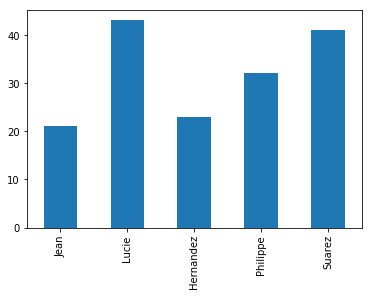

In [45]:
s2.plot.bar()

###### Booléen de l'existence d'un élément

In [35]:
flag1 = "Julie" in s2
flag2 = "Lucie" in s2
print(flag1)
print(flag2)

False
True


###### Tranformer pandas en dictionnaire et à l'inverse

In [36]:
s2_dict = s2.to_dict()
print(s2_dict)

{'Jean': 21, 'Lucie': 43, 'Hernandez': 23, 'Philippe': 32, 'Suarez': 41}


In [37]:
s6 = pd.Series(s2_dict)
print(s6)

Jean         21
Lucie        43
Hernandez    23
Philippe     32
Suarez       41
dtype: int64


###### drop_duplicates()

In [41]:
name = ["Lucky","Mendé","Clumsy"]
s7 = pd.Series([1,1,2],index = name)
print(s7)
s7.drop_duplicates()

Lucky     1
Mendé     1
Clumsy    2
dtype: int64


Lucky     1
Clumsy    2
dtype: int64

###### Existe-t-il des null pour les valeurs?   pd.isnull(s)

In [42]:
pd.isnull(s7)

Lucky     False
Mendé     False
Clumsy    False
dtype: bool

### pd.DataFrame()

In [2]:
horaires = pd.DataFrame({"Student 1":[i for i in range(1,4)],"Student 2":[i for i in range(1,6,2)],"Student 3":[i for i in range(2,7,2)]},index = ["lundi","mardi","mercredi"])
horaires

,Student 1,Student 2,Student 3
lundi,1,1,2
mardi,2,3,4
mercredi,3,5,6


In [3]:
Students = ["Jean","Pierre","Mar-x"]
Notes = [i for i in range(14,17)]
horaires1 = pd.DataFrame([Notes,Notes,Notes],index = ["lundi","mardi","mercredi"],columns = Students)
horaires1

,Jean,Pierre,Mar-x
lundi,14,15,16
mardi,14,15,16
mercredi,14,15,16


###### pd.values pd.index pd.columns

In [4]:
print(horaires.values)
print(horaires.index)
print(horaires.columns)

[[1 1 2]
 [2 3 4]
 [3 5 6]]
Index(['lundi', 'mardi', 'mercredi'], dtype='object')
Index(['Student 1', 'Student 2', 'Student 3'], dtype='object')


##### Information de Panorama

In [9]:
horaires.shape

(3, 3)

In [10]:
horaires.size

9

In [11]:
horaires.describe()

,Student 1,Student 2,Student 3
count,3.0,3.0,3.0
mean,2.0,3.0,4.0
std,1.0,2.0,2.0
min,1.0,1.0,2.0
25%,1.5,2.0,3.0
50%,2.0,3.0,4.0
75%,2.5,4.0,5.0
max,3.0,5.0,6.0


##### visiter une ligne ou les premières lignes

In [12]:
horaires.head(1)
horaires1.head(2)

,Jean,Pierre,Mar-x
lundi,14,15,16
mardi,14,15,16


##### visiter la dernière ligne

In [13]:
horaires1.tail(1)

,Jean,Pierre,Mar-x
mercredi,14,15,16


##### Voir des informations concernant un index quelconque

df.loc[index].loc[]

In [14]:
horaires1.loc["mardi"]

Jean      14
Pierre    15
Mar-x     16
Name: mardi, dtype: int64

In [70]:
horaires1.loc["mardi"].loc["Jean"]

14

In [74]:
horaires1.iloc[1].iloc[0]

14

In [8]:
horaires1.loc["mardi"].loc["Pierre"]

15

###### Opérations Mathématiques

In [16]:
Etudiant = ["Zijian","Raf","Zeynab","Ramzi","Chen"]
Notes1 = [13,14,12,11,10]
Notes2 = [16,12,12,15,19]
Semestre = [i for i in range(1,3)]
Annonce = pd.DataFrame([Notes1,Notes2],index = Semestre,columns=Etudiant)
Annonce

,Zijian,Raf,Zeynab,Ramzi,Chen
1,13,14,12,11,10
2,16,12,12,15,19


In [17]:
Annonce-1

,Zijian,Raf,Zeynab,Ramzi,Chen
1,12,13,11,10,9
2,15,11,11,14,18


##### df.apply(lambda)

In [18]:
Annonce+1
print(Annonce)
Annonce["Zijian"]=Annonce.apply(lambda x:x["Zijian"]+2,axis = 1)
Annonce

   Zijian  Raf  Zeynab  Ramzi  Chen
1      13   14      12     11    10
2      16   12      12     15    19


,Zijian,Raf,Zeynab,Ramzi,Chen
1,15,14,12,11,10
2,18,12,12,15,19


In [19]:
Annonce["Zeynab"]=Annonce.apply(lambda x:x["Zeynab"]+1,axis = 1)
Annonce

,Zijian,Raf,Zeynab,Ramzi,Chen
1,15,14,13,11,10
2,18,12,13,15,19


In [20]:
Annonce.loc[2] = Annonce.apply(lambda x:x.loc[2]+1,axis = 0)
Annonce

,Zijian,Raf,Zeynab,Ramzi,Chen
1,15,14,13,11,10
2,19,13,14,16,20


##### df.assign() ---modifier

注意assign不改变指针方向，表格被assign()函数called一遍后仍然不变

In [31]:
Tableau = pd.DataFrame({"C1":[1,4],"C2":[14,35],"C3":[3,6]},index = ['A','B'])
Tableau

,C1,C2,C3
A,1,14,3
B,4,35,6


In [32]:
### Attention ici au pointeur
Tableau = Tableau.assign(C2 = lambda x:x['C2']**2+10,C3 = lambda x:x['C3']*2-10)
Tableau

,C1,C2,C3
A,1,206,-4
B,4,1235,2


In [33]:
Tableau.loc['A'].max()

206

In [34]:
Tableau['C2'].min()

206

### Titanic example: Prévenir si une personne va survivre de la calamité.

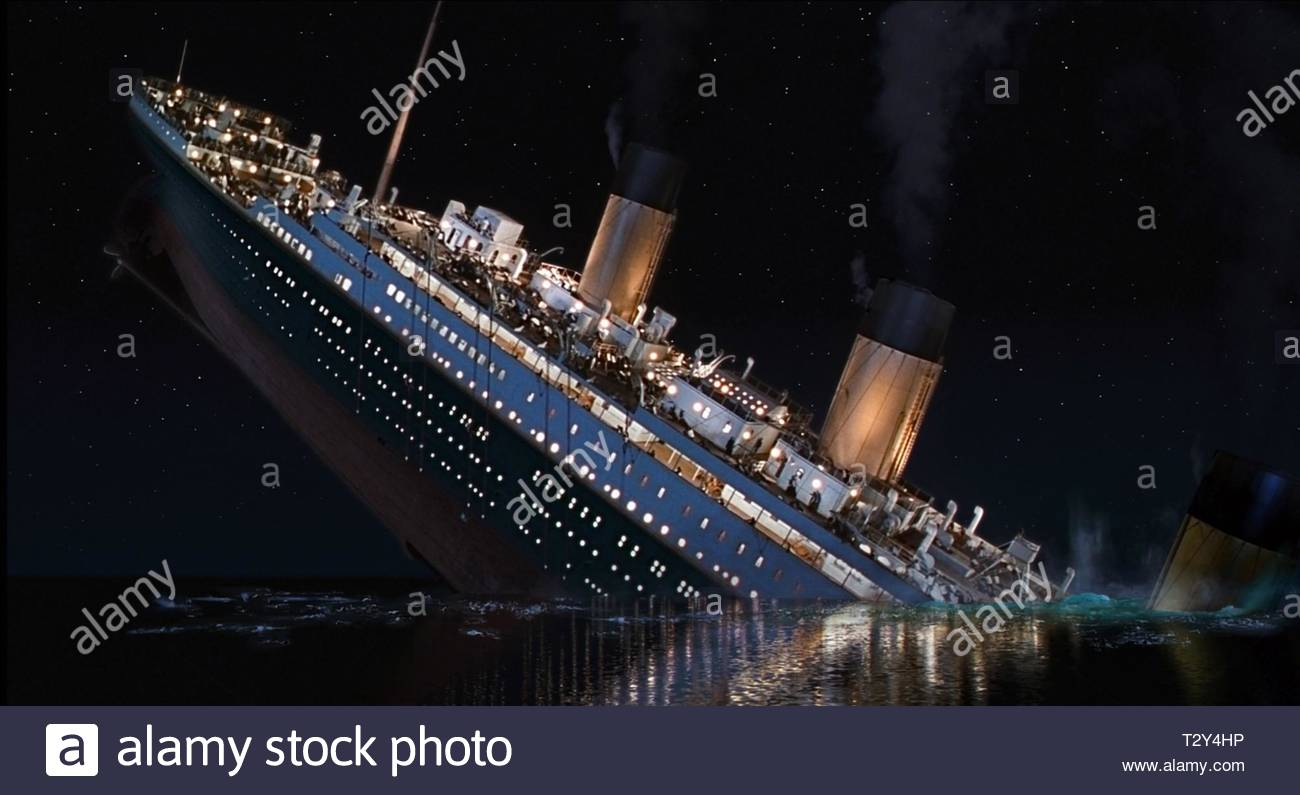

In [8]:
import IPython
from IPython.display import Image
Image("sinking-scene-titanic.jpg")

In [13]:
df = pd.read_csv("train.csv")
df.shape

(891, 12)

### Panorama des données

In [11]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


##### Dans la colonne Cabin, il y a beaucoup de NaN. Comment les traiter?

In [16]:
### Panorama des null
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

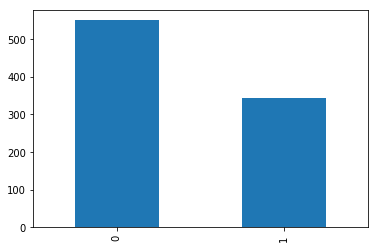

In [22]:
df.Survived.value_counts().plot(kind="bar")

In [19]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

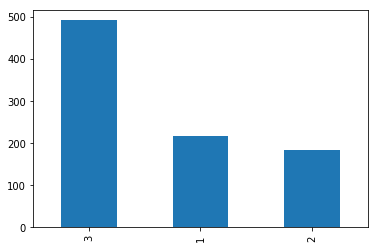

In [23]:
df.Pclass.value_counts().plot(kind="bar")

## NULL

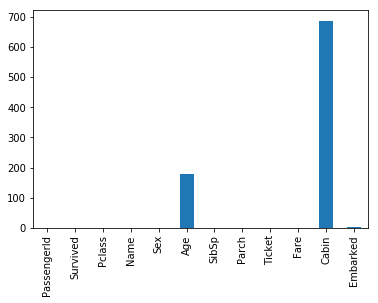

In [24]:
df.isnull().sum().plot(kind="bar")

### Ainsi, il vaut mieux supprimer les données sur Cabin pendant l'apprentissage de la machine，étant donné l'existence de trop de NULL

In [28]:
### Donc, supprimer la colonne de Cabin.
df1 = df.drop("Cabin",axis=1)# Cabin这一列沿着横轴删掉数据
df1.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


### Mais Pour le feature Age, est-ce que c'est pertinent de le supprimer??? Il semble que la colonne Age soit encore utile.

##### Si on mettait 20 pour tous les âges vides?

In [29]:
df1["Age"]=df1["Age"].fillna(20)
df1.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,20.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


##### Alors:::

In [32]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

### Il reste la partie Embarked qui existe des values nulles.

In [47]:
df1["Embarked"].notnull()

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
       ... 
861    True
862    True
863    True
864    True
865    True
866    True
867    True
868    True
869    True
870    True
871    True
872    True
873    True
874    True
875    True
876    True
877    True
878    True
879    True
880    True
881    True
882    True
883    True
884    True
885    True
886    True
887    True
888    True
889    True
890    True
Name: Embarked, Length: 891, dtype: bool

In [46]:
df1[df1["Embarked"].notnull()].shape

(889, 11)

In [33]:
df2 = df1[df1["Embarked"].notnull()]
df2.shape

(889, 11)

In [35]:
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [34]:
df2.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,20.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,Q


### Dans Python Pandas, on peut mettre ensemble les deux étapes avant:

##### supprimer la colonne Cabin 
##### réinitier les âges vides par 20

In [50]:
df3 = df.drop("Cabin",axis=1).assign(Age = lambda x:x["Age"].fillna(20))
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [51]:
df3 = df3[df3["Embarked"].notnull()]
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [52]:
df3.shape

(889, 11)

### Visualiser une partie des données

In [54]:
df1.loc[10:14]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S


In [55]:
df1.loc[10:14,["Name","Sex","Survived"]]

,Name,Sex,Survived
10,"Sandstrom, Miss. Marguerite Rut",female,1
11,"Bonnell, Miss. Elizabeth",female,1
12,"Saundercock, Mr. William Henry",male,0
13,"Andersson, Mr. Anders Johan",male,0
14,"Vestrom, Miss. Hulda Amanda Adolfina",female,0


In [60]:
df3.index = [i for i in range(1,890)]
df3.loc[10:14]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
10,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
11,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
12,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
13,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,S
14,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,S


### Combien de femmes et combien d'hommes qui survivent sur le bateau?

In [61]:
df.pivot_table(values = "PassengerId",index = "Survived",columns="Sex",aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


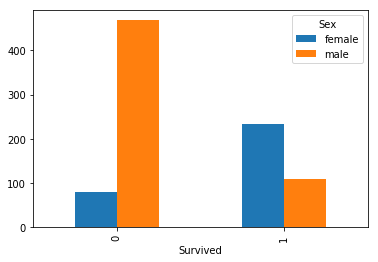

In [65]:
df0 = df.pivot_table(values = "PassengerId",index = "Survived",columns="Sex",aggfunc='count')
df0.plot(kind="bar")

### Alors, ceux qui survivent:

In [62]:
df4 = df.loc[df["Survived"]==1]#loc中插入boolean
df4.shape

(342, 12)

### Merge


df1.merge(df2,on = "df1,df2相同的基数",how = "outer"交集）

In [64]:
df5 = df3[["PassengerId","Name"]].merge(df3[["PassengerId","Age"]],on="PassengerId",how="outer")
df5.head(10)

,PassengerId,Name,Age
0,1,"Braund, Mr. Owen Harris",22.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,3,"Heikkinen, Miss. Laina",26.0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,5,"Allen, Mr. William Henry",35.0
5,6,"Moran, Mr. James",20.0
6,7,"McCarthy, Mr. Timothy J",54.0
7,8,"Palsson, Master. Gosta Leonard",2.0
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",14.0


### Pearson relation: [-1 , 1]

### Est-ce que si on était dans la Pclass S, il serait plus possible qu'on survive???

In [66]:
df["Survived"].corr(df["Pclass"])

-0.33848103596101475

### Est-ce que ceux qui n'ont pas survécu sont ceux qui sont plus âgés???

In [67]:
df["Age"].corr(df["Survived"])

-0.07722109457217764